In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.& 2 Load the dataset into python environment & Make ‘PassengerId’ as the index column

In [183]:
data=pd.read_csv("titanic_dataset.csv",index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [184]:
# describing the dataset
data.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [186]:
# Check the null value count
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

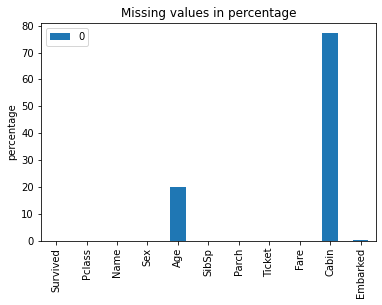

In [187]:
#Check the distribution of missing values
miss_value=pd.DataFrame(data.isna().sum()/len(data) *100)
miss_value.plot(kind="bar",title="Missing values in percentage", ylabel='percentage')
plt.show()

In [188]:
#we ill drop the column cabin
data.drop("Cabin",axis=1,inplace=True)
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

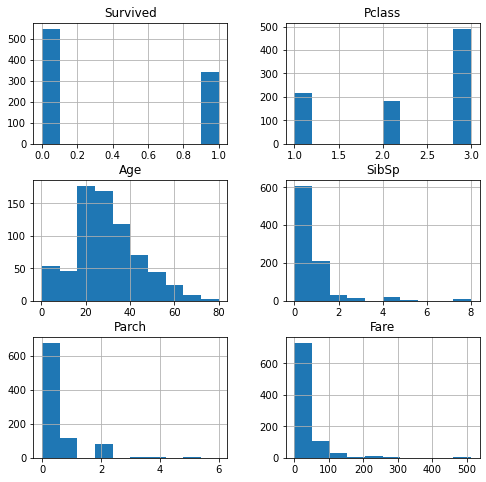

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Figure size 432x288 with 0 Axes>

In [189]:
# check the skeweness of the numerical field
numerical_data=data.select_dtypes(exclude="object")
numerical_data.hist(figsize=(8,8))
plt.show()
plt.tight_layout()
numerical_data.columns

In [190]:
# numerical features are  skewed, so we will use median to fill the null values in "Age" features
# we will fill the null values in categorical column "Embarked" with its mode
#data["Age"]=data["Age"].fillna(data["Age"].median())
from sklearn.impute import SimpleImputer

def get_parameters(data):
    parameters={}
    for i in data.columns[data.isnull().any()]:
        if data[i].dtype=="int64" or data[i].dtype=="float64":
            strategy="median"
        else:
            strategy="most_frequent"
        missing_values=data[i][data[i].isnull()].values[0]
        parameters[i]={"missing_values":missing_values,"strategy":strategy}
    return parameters
get_parameters(data)

{'Age': {'missing_values': nan, 'strategy': 'median'},
 'Embarked': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [193]:
cols=["Age","Embarked"]
parameters=get_parameters(data)
for col,param in parameters.items():
    missing_values=param["missing_values"]
    strategy=param["strategy"]
    imp=SimpleImputer(missing_values=missing_values,strategy=strategy)
    data[col]=imp.fit_transform(data[[col]])
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

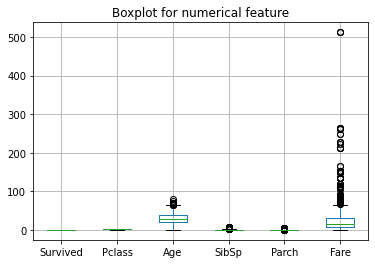

In [195]:
#Check for the outliers
numerical_data.boxplot()
plt.title("Boxplot for numerical feature")
numerical_data.columns

In [196]:
# Handling of Outliers
#1. Handling of outliers in Age
cols=['Age', 'SibSp', 'Parch', 'Fare']
# Calculating the IQR value "Age" and setting the lower & upper limit for the outliers
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

data.loc[data["Age"] <low_lim,"Age"] = low_lim
data.loc[data["Age"] >up_lim,"Age"] = up_lim


In [197]:
# 2. Handling of outliers in SibSp
# Calculating the IQR value "SibSp" and setting the lower & upper limit for the outliers
Q1=np.percentile(data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(data["SibSp"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

data.loc[data["SibSp"] <low_lim,"SibSp"] = low_lim
data.loc[data["SibSp"] >up_lim,"SibSp"] = up_lim

In [198]:
# 3. Handling of outliers in Parch
# Calculating the IQR value "Parch" and setting the lower & upper limit for the outliers
Q1=np.percentile(data["Parch"],25,interpolation="midpoint")
Q2=np.percentile(data["Parch"],50,interpolation="midpoint")
Q3=np.percentile(data["Parch"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

data.loc[data["Parch"] <low_lim,"Parch"] = low_lim
data.loc[data["Parch"] >up_lim,"Parch"] = up_lim

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [199]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S


In [200]:
data["Sex"]=pd.get_dummies(data["Sex"],drop_first=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,S


In [201]:
#Fpr Embarked feature we will gor for one hot encoding 
data=pd.get_dummies(data, columns=['Embarked'])

In [151]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,71.2833,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,0,0,1


In [202]:
#drop feature "ticket"
data.drop("Ticket",axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,7.2500,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,71.2833,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,8.0500,0,0,1


In [203]:
#drop feature "Name"
data.drop("Name",axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0,0,1
2,1,1,0,38.0,1.0,0,71.2833,1,0,0
3,1,3,0,26.0,0.0,0,7.9250,0,0,1
4,1,1,0,35.0,1.0,0,53.1000,0,0,1
5,0,3,1,35.0,0.0,0,8.0500,0,0,1


In [204]:
#SibSp shows no. of sibilings that the passenger travelled with
# parch shows no .of parents & children that the passenger travelled with
data["Family"]=data["SibSp"]+data["Parch"]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0,0,1,1.0
2,1,1,0,38.0,1.0,0,71.2833,1,0,0,1.0
3,1,3,0,26.0,0.0,0,7.9250,0,0,1,0.0
4,1,1,0,35.0,1.0,0,53.1000,0,0,1,1.0
5,0,3,1,35.0,0.0,0,8.0500,0,0,1,0.0


In [205]:
data.loc[data["Family"]>0,'Travelled_Alone']=0
data.loc[data["Family"]==0,'Travelled_Alone']=1
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,Travelled_Alone
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0,0,1,1.0,0.0
2,1,1,0,38.0,1.0,0,71.2833,1,0,0,1.0,0.0
3,1,3,0,26.0,0.0,0,7.9250,0,0,1,0.0,1.0
4,1,1,0,35.0,1.0,0,53.1000,0,0,1,1.0,0.0
5,0,3,1,35.0,0.0,0,8.0500,0,0,1,0.0,1.0


<AxesSubplot:title={'center':'Passenger Travelled Alone?'}>

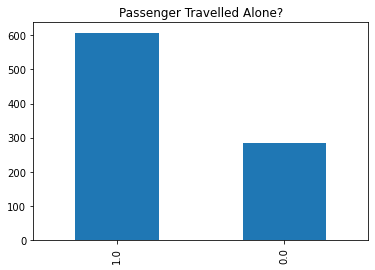

In [206]:
data.Travelled_Alone.value_counts().plot(kind="bar", title="Passenger Travelled Alone?")

insight:
    608 passengers travelled alone

In [207]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,Travelled_Alone
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0,0,1,1.0,0.0
2,1,1,0,38.0,1.0,0,71.2833,1,0,0,1.0,0.0
3,1,3,0,26.0,0.0,0,7.9250,0,0,1,0.0,1.0
4,1,1,0,35.0,1.0,0,53.1000,0,0,1,1.0,0.0
5,0,3,1,35.0,0.0,0,8.0500,0,0,1,0.0,1.0


In [214]:
# apply linera regression to see the MSE and r2 score value

y=data["Survived"]
x=data.drop("Survived", axis=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("r2 score:",r2_score(y_test,prediction))

Mean Squared Error: 0.1351915507626632
r2 score: 0.4292921636381434


# min max scaling on the feature set on Survived

In [168]:
from sklearn.preprocessing import MinMaxScaler

Selecting numerical features:

In [215]:
numerical_data
num_cols=data.select_dtypes(include=["int64","float64","int32"]).columns
num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Travelled_Alone'],
      dtype='object')

In [219]:
y=data["Survived"]
x=data.drop("Survived", axis=1)
minmax=MinMaxScaler(feature_range=(0,1))
x=minmax.fit_transform(x)
x=pd.DataFrame(x)
x.describe

<bound method NDFrame.describe of       0    1         2    3    4         5    6    7    8    9    10
0    1.0  1.0  0.375000  0.4  0.0  0.014151  0.0  0.0  1.0  0.4  0.0
1    0.0  0.0  0.682692  0.4  0.0  0.139136  1.0  0.0  0.0  0.4  0.0
2    1.0  0.0  0.451923  0.0  0.0  0.015469  0.0  0.0  1.0  0.0  1.0
3    0.0  0.0  0.625000  0.4  0.0  0.103644  0.0  0.0  1.0  0.4  0.0
4    1.0  1.0  0.625000  0.0  0.0  0.015713  0.0  0.0  1.0  0.0  1.0
..   ...  ...       ...  ...  ...       ...  ...  ...  ...  ...  ...
886  0.5  1.0  0.471154  0.0  0.0  0.025374  0.0  0.0  1.0  0.0  1.0
887  0.0  0.0  0.317308  0.0  0.0  0.058556  0.0  0.0  1.0  0.0  1.0
888  1.0  0.0  0.490385  0.4  0.0  0.045771  0.0  0.0  1.0  0.4  0.0
889  0.0  1.0  0.451923  0.0  0.0  0.058556  1.0  0.0  0.0  0.0  1.0
890  1.0  1.0  0.567308  0.0  0.0  0.015127  0.0  1.0  0.0  0.0  1.0

[891 rows x 11 columns]>

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("r2 score:",r2_score(y_test,prediction))

Mean Squared Error: 0.13519155076266326
r2 score: 0.42929216363814315


Insight: 
    1.Mse & r2 score value still same.
    2.No impact os standisation